Вариант 6:
$$\ddot{u} + (3 + \sin^3t)u - u^4 = 0,\ \ \ \ \ u(0) = 0,\, u(\pi) = 0$$

Для начала решим следующее дифф.ур.:
$$\ddot{u} + (1 + \sin^3t)u - u^4 = 0$$

Легко видеть, что $u(t) = \sin t$ является решением.



Далее введем параметр $\lambda$ и будем решать такое уравнение:
$$\ddot{u} + (\lambda + 1 + \sin^3t)u - u^4 = 0,$$
где $\lambda$ будет принимать значения от 0 до 2.


Уравнение решаем численно с помощью разностной схемы $\ddot{u} = \frac{1}{h^2} (u_{k + 1} - 2u_k + u_{k - 1}) + o(h^2)$. Получаем:
$$\frac{1}{h^2} (u_{k + 1} + u_{k - 1}) + (\lambda + 1 - \frac{2}{h^2} + \sin^3t_k)u_k - u_k^4 = 0$$

Сделаем замены $A = \frac{1}{h^2}$ и $C_k = \lambda + 1 - \frac{2}{h^2} + \sin^3t_k$. С учетом нулевых начальных условий получаем следующую систему:
1) $F_1(u_1,\, ...,\, u_{N - 1}) = A u_{2} + C_k u_1 - u_1^4 = 0$
2) $F_k(u_1,\, ...,\, u_{N - 1}) = A (u_{k + 1} + u_{k - 1}) + C_k u_k - u_k^4 = 0,\ \ k = 2,\, ...,\, N - 2$
3) $F_{N - 1}(u_1,\, ...,\, u_{N - 1}) = A u_{N - 2} + C_k u_{N - 1} - u_{N - 1}^4 = 0$

Решать ее будем с помощью метода Ньютона.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

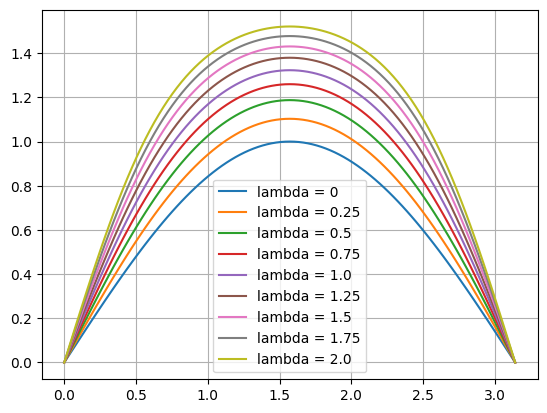

In [6]:
lms = [i/4 for i in range(1, 9)]

N = 100
a, b = 0, np.pi
t = np.linspace(a, b, N + 1)
h = (b - a) / N

u = []
u.append(np.array([[np.sin(t[i])] for i in range(1, len(t) - 1)]))
plt.plot(t, [0] + list(u[-1].T[0]) + [0], label=f'lambda = 0')
A = 1 / h ** 2

for lm in lms:
    while True:
        C_k = lambda t: lm + 1 - 2 * A + np.sin(t) ** 3
        F = np.zeros((N - 1, 1))
        F[0][0] = C_k(t[1]) * u[-1][0][0] + A * u[-1][1][0] - u[-1][0][0] ** 4
        for i in range(1, N - 2):
            F[i][0] = A * u[-1][i - 1][0] + C_k(t[i + 1]) * u[-1][i][0] + A * u[-1][i + 1][0] - u[-1][i][0] ** 4
        F[N - 2][0] = A * u[-1][N - 3][0] + C_k(t[N - 1]) * u[-1][N - 2][0] - u[-1][N - 2][0] ** 4
        J = np.zeros((N - 1, N - 1))
    
        J[0][0] = C_k(t[1]) - 4*u[-1][0][0] ** 3
        J[0][1] = A
        for i in range(1, N - 2):
            J[i][i - 1] = A
            J[i][i] = C_k(t[i + 1]) - 4*u[-1][i][0] ** 3
            J[i][i + 1] = A
        J[N - 2][N - 3] = A
        J[N - 2][N - 2] = C_k(t[N - 1]) - 4*u[-1][N - 2][0] ** 3

        u.append(u[-1] - np.linalg.inv(J) @ F)

        if np.amax(abs(u[-2] - u[-1])) < 10 ** -5:
            plt.plot(t, [0] + list(u[-1].T[0]) + [0], label=f'lambda = {lm}')
            break
plt.legend()            
plt.grid(True)